In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras
import keras.applications as kapp
from keras.applications import *

from keras.preprocessing import image
from keras.models import Model
import numpy as np
import io

from tqdm.notebook import tqdm
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

from keras.preprocessing import image
from keras.models import Model


from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import time
from sklearn.metrics import accuracy_score
import pandas as pd

import matplotlib.pyplot as plt

In [8]:
# Augmentacja obrazów - docelowo przed stworzeniem wektorów X i y
import random
import os
import tensorflow as tf
from tqdm.notebook import tqdm
import numpy as np


# 1)

train_data_dir = r'chest_xray/chest_xray/train'
test_data_dir = r'chest_xray/chest_xray/test'



from keras.preprocessing.image import ImageDataGenerator

# dimensions of our images.
img_width, img_height = 200, 200
batch_size = 16


nb_train_samples = 10000 #Możemy zwiększyć tą liczbę obrazów zaugmentowanych 
nb_validation_samples = 624


#model = new_model

# prepare data augmentation configuration - do dostosowania w tym projekcie
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   brightness_range= [0.5,1.5],
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # na zbiorze walidacyjnym testujemy bez dodatkowych przekształceń


train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=batch_size, class_mode='binary') # - to wrzucamy do modelu

validation_generator = test_datagen.flow_from_directory(test_data_dir,target_size=(img_height, img_width), 
                                                        batch_size=batch_size,class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


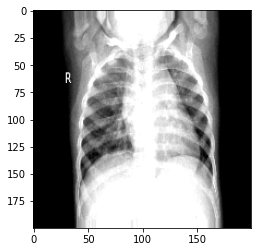

In [13]:
#przykładowy obraz
plt.imshow(train_generator[0][0][0])

In [4]:
# wyniki modelu
def evaluate_model(model, generator):
    score = model.evaluate_generator(generator=generator,               # Generator yielding tuples
                                     verbose=0)
    return(score[0], score[1])

In [5]:
wyniki = pd.DataFrame(columns = ['val_loss','val_acc'])

In [6]:
h,w = 200, 200

In [7]:
# Model CNN - VGG19



base_model = VGG19(weights='imagenet', include_top=False, input_shape=(h,w,3))

# Dodatkowe warstwy i klasyfikacja
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# Połączenie obu modeli
new_model = Sequential()
new_model.add(base_model)
new_model.add(top_model)
new_model.layers[0].trainable = False

# Kompilacja modelu
new_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
# Callbacki

my_callbacks = [
    EarlyStopping(patience=4, monitor='val_loss', min_delta=0.05, restore_best_weights=True),
    ModelCheckpoint(filepath='model1.h5'),
    #keras.callbacks.TensorBoard(log_dir='./logs'),
]

# Trenowanie sieci neuronowej

new_model.fit_generator(train_generator, steps_per_epoch=nb_train_samples, epochs=80, callbacks=my_callbacks, validation_data=validation_generator, validation_steps=nb_validation_samples)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
    6/10000 [..............................] - ETA: 19:33:45 - loss: 2.0813 - accuracy: 0.6042

KeyboardInterrupt: 

In [ ]:
wyniki.loc['VGG19'] = evaluate_model(new_model, validation_generator)
wyniki

In [ ]:
# Model CNN - VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(h,w,3)) 

# Dodatkowe warstwy i klasyfikacja
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# Połączenie obu modeli
new_model = Sequential()
new_model.add(base_model)
new_model.add(top_model)
new_model.layers[0].trainable = False

# Callbacki

my_callbacks = [
    EarlyStopping(patience=4, monitor='val_loss', min_delta=0.05, restore_best_weights=True),
    ModelCheckpoint(filepath='model1.h5'),
    #keras.callbacks.TensorBoard(log_dir='./logs'),
]

# Kompilacja modelu
new_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Trenowanie sieci neuronowej

new_model.fit_generator(train_generator, 
                        steps_per_epoch=nb_train_samples, 
                        epochs=80, 
                        callbacks=my_callbacks, 
                        validation_data=validation_generator, 
                        validation_steps=nb_validation_samples)

In [ ]:
wyniki.loc['VGG16'] = evaluate_model(new_model, validation_generator)
wyniki

In [ ]:
# Model CNN - InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(h,w,3)) 

# Dodatkowe warstwy i klasyfikacja
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# Połączenie obu modeli
new_model = Sequential()
new_model.add(base_model)
new_model.add(top_model)
new_model.layers[0].trainable = False

# Kompilacja modelu
new_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Callbacki

my_callbacks = [
    EarlyStopping(patience=4, monitor='val_loss', min_delta=0.05, restore_best_weights=True),
    ModelCheckpoint(filepath='model1.h5'),
    #keras.callbacks.TensorBoard(log_dir='./logs'),
]

# Trenowanie sieci neuronowej

new_model.fit_generator(train_generator, 
                        steps_per_epoch=nb_train_samples, 
                        epochs=80, 
                        callbacks=my_callbacks, 
                        validation_data=validation_generator, 
                        validation_steps=nb_validation_samples)

In [ ]:
wyniki.loc['InceptionV3'] = evaluate_model(new_model, validation_generator)
wyniki

In [ ]:
# Model CNN - Xception

base_model = Xception(weights='imagenet', include_top=False, input_shape=(h,w,3)) 

# Dodatkowe warstwy i klasyfikacja
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# Połączenie obu modeli
new_model = Sequential()
new_model.add(base_model)
new_model.add(top_model)
new_model.layers[0].trainable = False

# Callbacki

my_callbacks = [
    EarlyStopping(patience=4, monitor='val_loss', min_delta=0.05, restore_best_weights=True),
    ModelCheckpoint(filepath='model1.h5'),
    #keras.callbacks.TensorBoard(log_dir='./logs'),
]

# Kompilacja modelu
new_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Trenowanie sieci neuronowej

new_model.fit_generator(train_generator, 
                        steps_per_epoch=nb_train_samples, 
                        epochs=80, 
                        callbacks=my_callbacks, 
                        validation_data=validation_generator, 
                        validation_steps=nb_validation_samples)

In [ ]:
wyniki.loc['Xception'] = evaluate_model(new_model, validation_generator)
wyniki

In [ ]:
# Model CNN - ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(h,w,3)) 

# Dodatkowe warstwy i klasyfikacja
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# Połączenie obu modeli
new_model = Sequential()
new_model.add(base_model)
new_model.add(top_model)
new_model.layers[0].trainable = False

# Callbacki

my_callbacks = [
    EarlyStopping(patience=4, monitor='val_loss', min_delta=0.05, restore_best_weights=True),
    ModelCheckpoint(filepath='model1.h5'),
    #keras.callbacks.TensorBoard(log_dir='./logs'),
]

# Kompilacja modelu
new_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Trenowanie sieci neuronowej

new_model.fit_generator(train_generator, 
                        steps_per_epoch=nb_train_samples, 
                        epochs=80, 
                        callbacks=my_callbacks, 
                        validation_data=validation_generator, 
                        validation_steps=nb_validation_samples)

In [ ]:
wyniki.loc['ResNet50'] = evaluate_model(new_model, validation_generator)
wyniki